# Library & Dataset

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

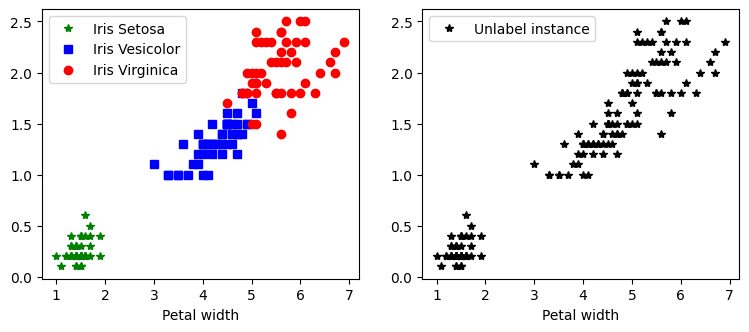

In [2]:
iris = load_iris() # We will use the iris dataset without its labels
X = iris.data[:, 2:]
y = iris.target
plt.figure(figsize=(9, 3.5))
plt.subplot(121,)
plt.plot(X[y==0,0], X[y==0,1], "g*", label="Iris Setosa")
plt.plot(X[y==1,0], X[y==1,1], "bs", label="Iris Vesicolor")
plt.plot(X[y==2,0], X[y==2,1], "ro", label="Iris Virginica")
plt.xlabel("Petal length", fontsize=10)
plt.xlabel("Petal width", fontsize=10)
plt.legend(fontsize=10)
plt.subplot(122,)
plt.plot(X[:,0], X[:,1], "k*", label="Unlabel instance")
plt.xlabel("Petal length", fontsize=10)
plt.xlabel("Petal width", fontsize=10)
plt.legend(fontsize=10)
plt.show()

# K Mean Clustering From Scratch

In [3]:
# First, we will create a helper function to calculate the Euclidean distance between two points.
def euclidean(point, centroid):
  return np.sqrt(np.sum((point - centroid) ** 2))

In [4]:
def showplot(centroids):
  plt.figure(figsize=(9, 3.5))
  plt.plot(X[:,0], X[:,1], "k*", label="Unlabel instance")
  plt.plot([x for x, _ in centroids],[y for _, y in centroids], '+', markersize=10,)
  plt.xlabel("Petal length", fontsize=10)
  plt.xlabel("Petal width", fontsize=10)
  plt.legend(fontsize=10)
  plt.show()

In [5]:
# Next, we need a way to initialize the starting point of each centroid.
# We will calculate it by uniformly distributing each centroid in the graph.
from numpy.random import uniform
import numpy as np

n_clusters = 3 # The data set have 3 class hench 3 cluster centroids we need to make

minpoint, maxpoint = np.min(X[:,:], axis=0), np.max(X[:,:], axis=0)
centroids = np.array([uniform(low=minpoint, high=maxpoint) for _ in range(n_clusters)])
print(minpoint, maxpoint)
print(centroids)

[1.  0.1] [6.9 2.5]
[[2.64231751 0.25271088]
 [1.82972603 0.60792363]
 [6.8854929  2.21275073]]


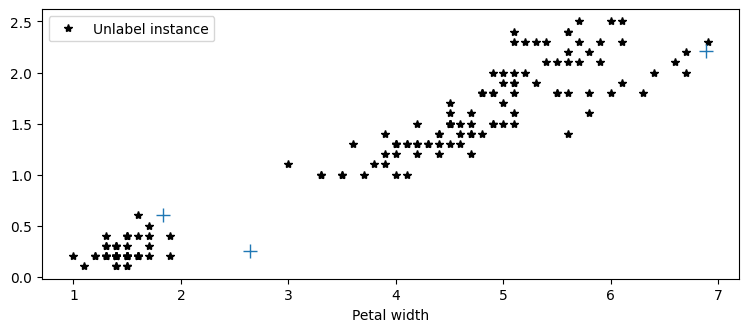

In [6]:
showplot(centroids)

In [7]:
def showplotwithclass(sorted_x, centroids):
    plt.figure(figsize=(9, 3.5))

    colors = plt.cm.tab20.colors

    for i, cluster_points in enumerate(sorted_x):
        if len(cluster_points) == 0:  # Skip empty clusters
            continue
        cluster_points = np.array(cluster_points)
        plt.plot(cluster_points[:, 0], cluster_points[:, 1],
                 marker='o', linestyle='', color=colors[i % len(colors)],
                 label=f"Class {i + 1} instances")

    plt.plot([x for x, _ in centroids],
             [y for _, y in centroids],
             'k+', markersize=10, label="Centroids")

    plt.xlabel("Petal length", fontsize=10)
    plt.ylabel("Petal width", fontsize=10)
    plt.legend(fontsize=10)
    plt.show()

In [8]:
def calculateClass(X, centroids):
  sorted_x = [[] for _ in range(n_clusters)]  # Independent lists
  for x in X:
    dists = [euclidean(x, centroid) for centroid in centroids]
    centroid_idx = np.argmin(dists)
    sorted_x[centroid_idx].append(x)

  sorted_x = [np.array(cluster) for cluster in sorted_x]

  showplotwithclass(sorted_x, centroids)
  return sorted_x

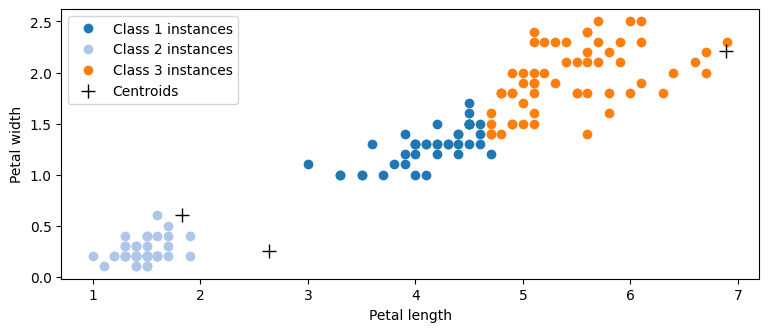

In [9]:
res = calculateClass(X, centroids)

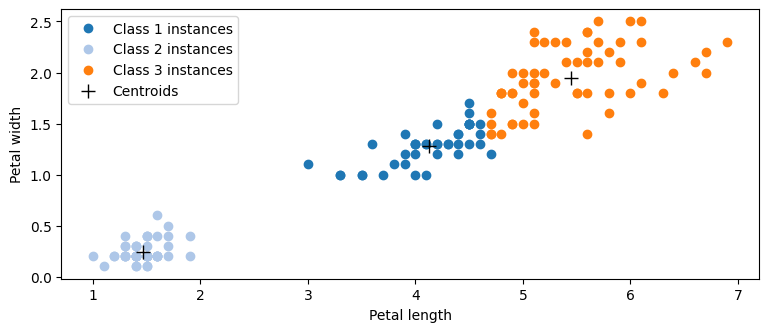

In [10]:
# After that, we use the result to adjust the current centroid.
# Reassign centroids as the mean of the points belonging to them.
def adjustCentroid(sorted_x, centroids):
  prev_centroids = centroids
  centroids = [np.mean(cluster, axis=0) for cluster in sorted_x]
  for i, centroid in enumerate(centroids):
    if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
      centroids[i] = prev_centroids[i]

  showplotwithclass(sorted_x, centroids)
  return centroids
res = adjustCentroid(res, centroids)

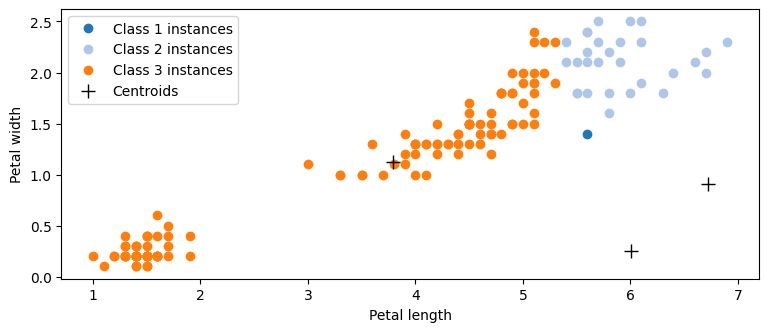

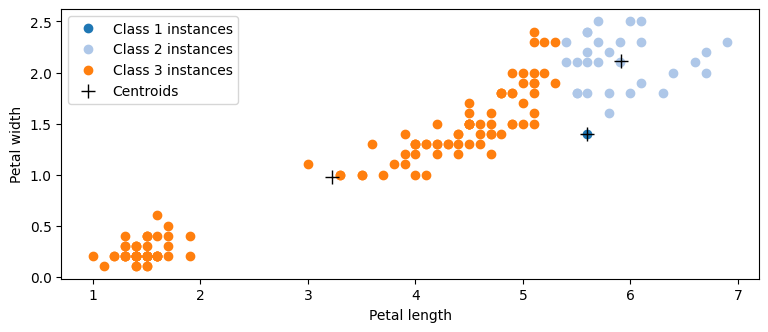

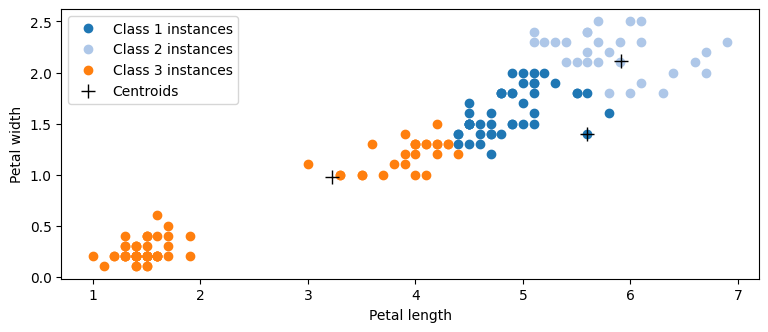

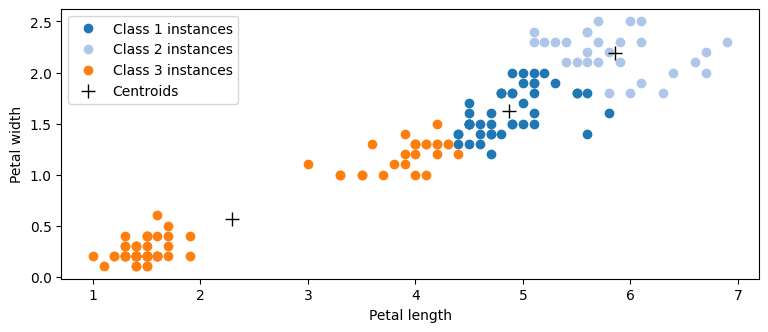

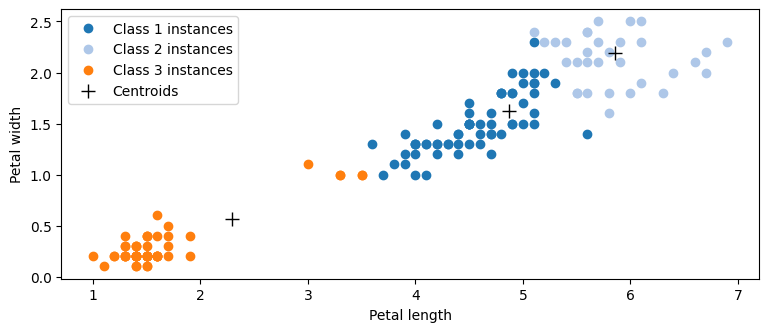

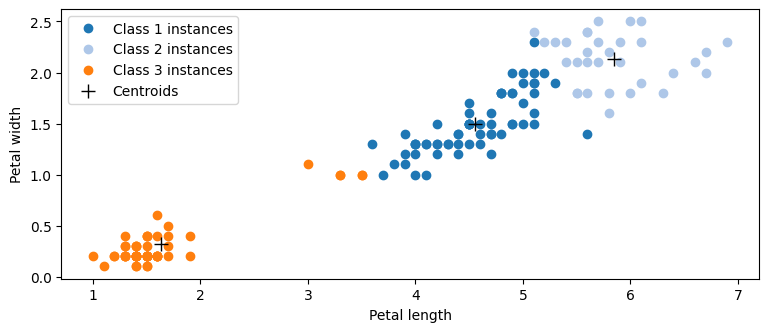

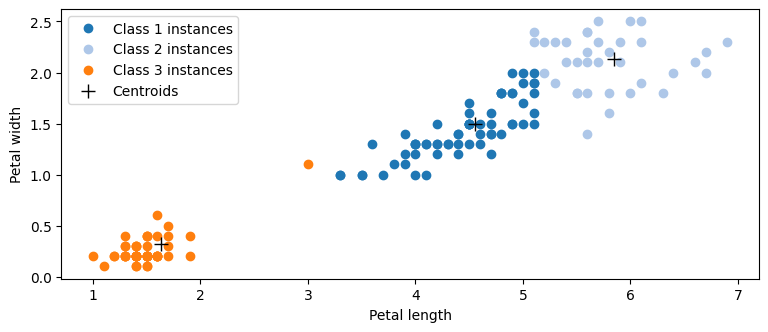

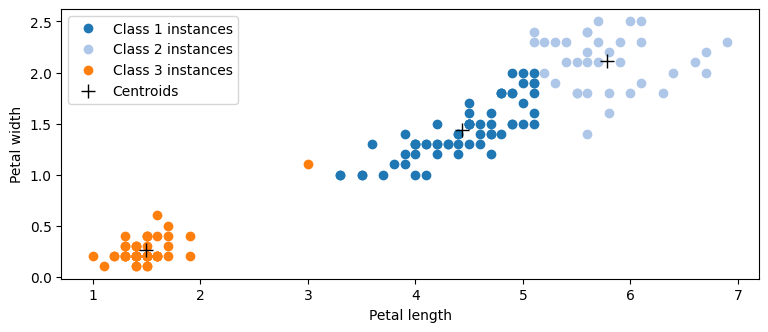

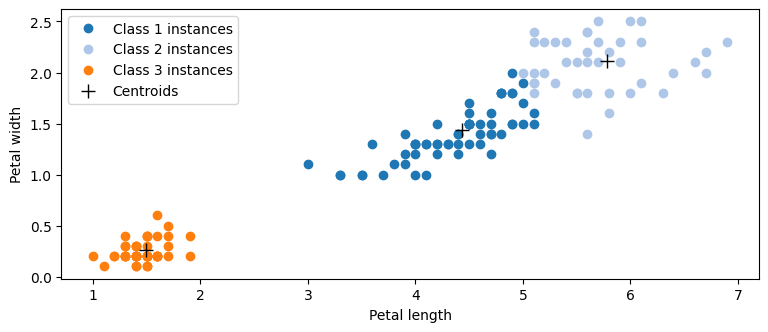

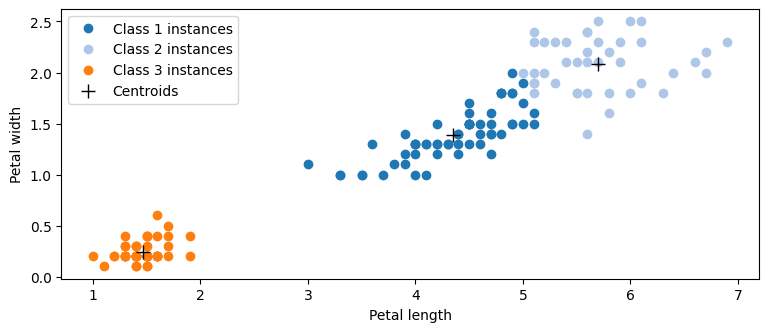

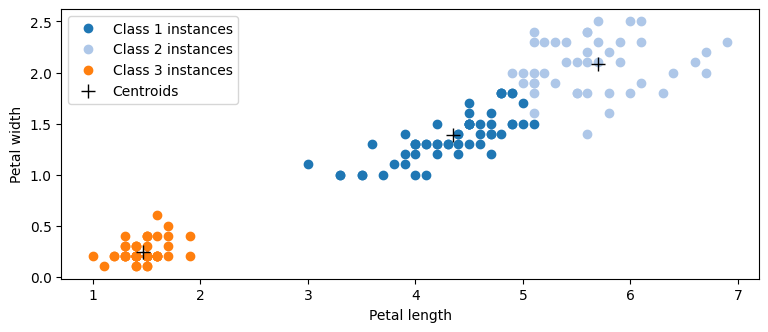

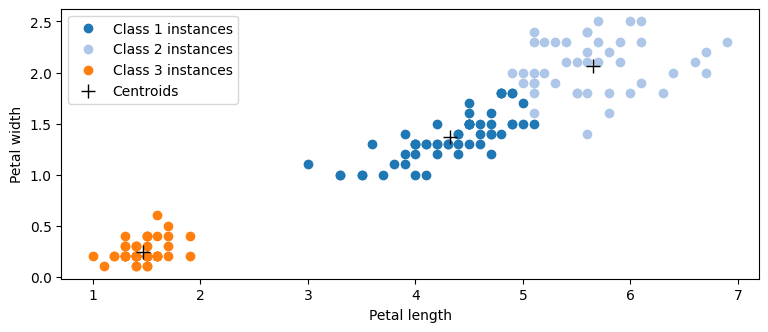

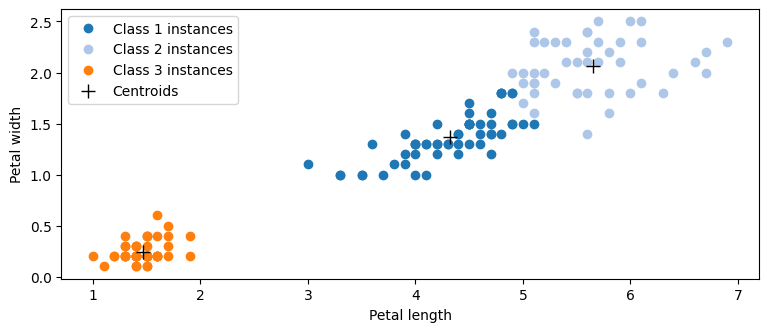

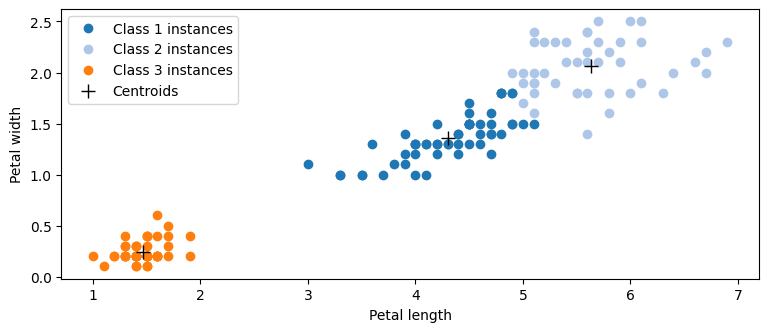

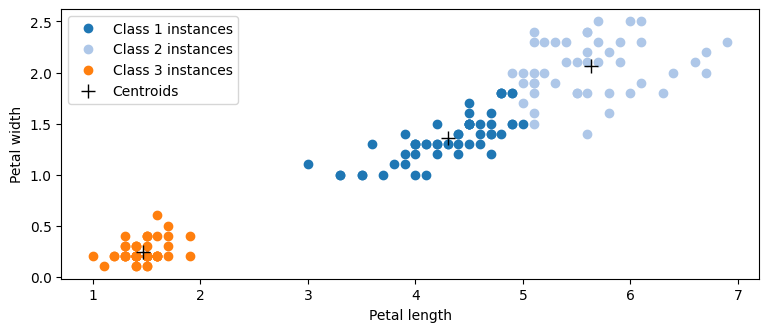

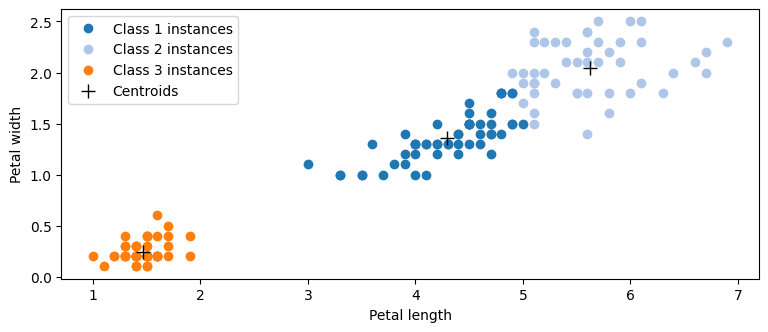

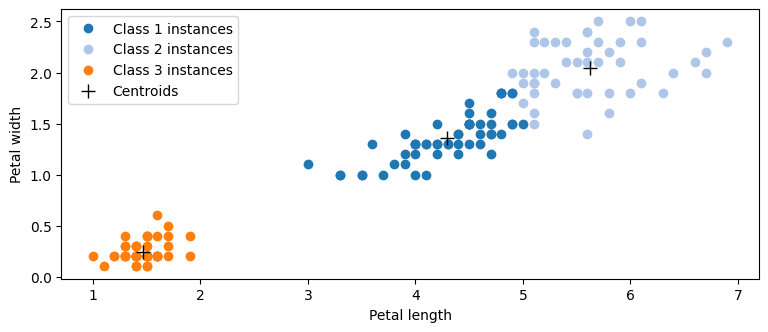

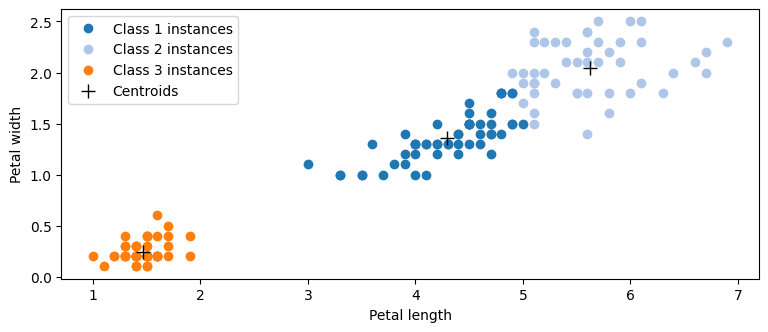

In [11]:
# We will create a computation loop like this.
def train(X, n_clusters):
  minpoint, maxpoint = np.min(X[:,:], axis=0), np.max(X[:,:], axis=0)
  centroids = np.array([uniform(low=minpoint, high=maxpoint) for _ in range(n_clusters)])
  while True:
    sorted_x = calculateClass(X, centroids)
    new_centroid = adjustCentroid(sorted_x, centroids)
    if np.allclose(centroids, new_centroid): break
    centroids = new_centroid
train(X, 3)

# K Mean CLustering From SciKitLearn API

In [12]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=3)  #3 kinds of Iris flowers
y_pred= kmeans.fit_predict(X)

print(y_pred, "\n",kmeans.labels_)
print(kmeans.cluster_centers_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0] 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]
[[5.59583333 2.0375    ]
 [1.462      0.246     ]
 [4.26923077 1.34230769]]


In [13]:
import numpy as np
X_new= np.array([[1.9, 1.25], [5.05, 2.37]])
kmeans.predict(X_new)

array([1, 0], dtype=int32)

In [14]:
print(type(kmeans))
kmeans.transform(X_new)

<class 'sklearn.cluster._kmeans.KMeans'>


array([[3.77880143, 1.09538121, 2.37102829],
       [0.63913244, 4.16954674, 1.29064018]])

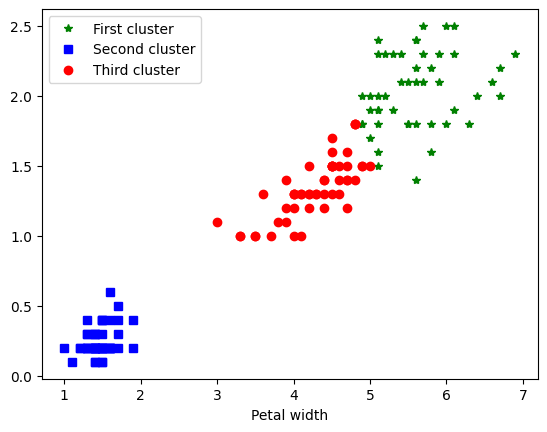

In [15]:
plt.plot(X[y_pred==0,0], X[y_pred==0,1], "g*", label="First cluster")
plt.plot(X[y_pred==1,0], X[y_pred==1,1], "bs", label="Second cluster")
plt.plot(X[y_pred==2,0], X[y_pred==2,1], "ro", label="Third cluster")
plt.xlabel("Petal length", fontsize=10)
plt.xlabel("Petal width", fontsize=10)
plt.legend(fontsize=10)
plt.show()

In [16]:
# inertia method to observe squared distance between cluster instances and centroid
kmeans.inertia_

31.371358974358966

In [17]:
# improving with n_initial
kmeans_improved = KMeans(n_clusters=3, n_init=10)
y_pred_imp = kmeans_improved.fit_predict(X)
kmeans_improved.inertia_

31.371358974358966

# K-Means Clustering usage on the penguins dataset

In [18]:
# Download latest version
import kagglehub
import os
import pandas as pd

path = kagglehub.dataset_download("parulpandey/palmer-archipelago-antarctica-penguin-data")
folder_path = path
print(os.listdir(folder_path))

csv_path = os.path.join(folder_path, 'penguins_size.csv') # เลือก penguins_size.csv
penguins = pd.read_csv(csv_path).dropna()
penguins.head()


['penguins_size.csv', 'penguins_lter.csv']


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [19]:
X = penguins.drop(['species','island','sex'], axis=1)
y = penguins.species.astype('category').cat.codes
y.unique()

penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


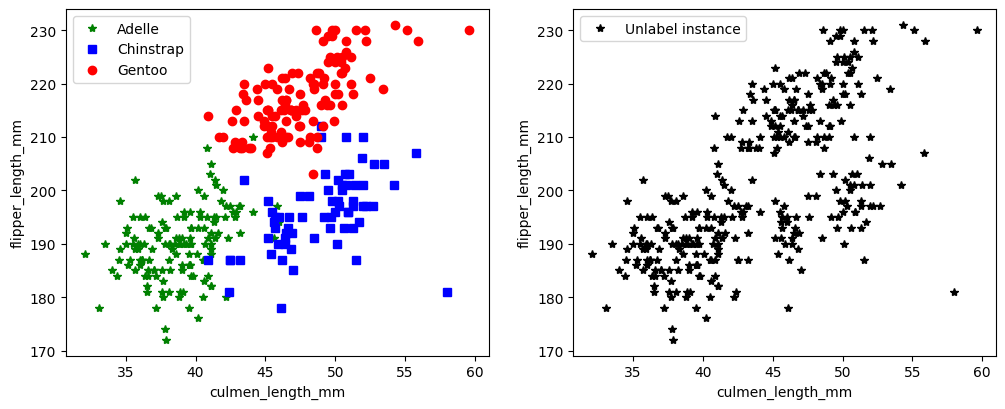

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4.5))
#labeled samples
plt.subplot(121,)
plt.plot(X[y==0]['culmen_length_mm'], X[y==0]['flipper_length_mm'], "g*", label="Adelle")
plt.plot(X[y==1]['culmen_length_mm'], X[y==1]['flipper_length_mm'], "bs", label="Chinstrap")
plt.plot(X[y==2]['culmen_length_mm'], X[y==2]['flipper_length_mm'], "ro", label="Gentoo")
plt.xlabel("culmen_length_mm", fontsize=10)
plt.ylabel("flipper_length_mm", fontsize=10)
plt.legend(fontsize=10)
#unlabeled samples
plt.subplot(122,)
plt.plot(X[:]['culmen_length_mm'], X[:]['flipper_length_mm'], "k*", label="Unlabel instance")
plt.xlabel("culmen_length_mm", fontsize=10)
plt.ylabel("flipper_length_mm", fontsize=10)
plt.legend(fontsize=10)
plt.show()

In [21]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=3)  #3 kinds of Iris flowers
X['cluster']= kmeans.fit_predict(X)
X
# print(y_pred, "\n",kmeans.labels_)
# print(kmeans.cluster_centers_)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,cluster
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,2
340,46.8,14.3,215.0,4850.0,2
341,50.4,15.7,222.0,5750.0,1
342,45.2,14.8,212.0,5200.0,1


In [22]:
print(kmeans.inertia_)
print(kmeans.cluster_centers_)

28657783.89161042
[[  41.39277108   18.0626506   190.45783133 3536.44578313]
 [  49.30655738   15.64918033  221.06557377 5501.63934426]
 [  45.00186916   16.62242991  205.96261682 4515.65420561]]


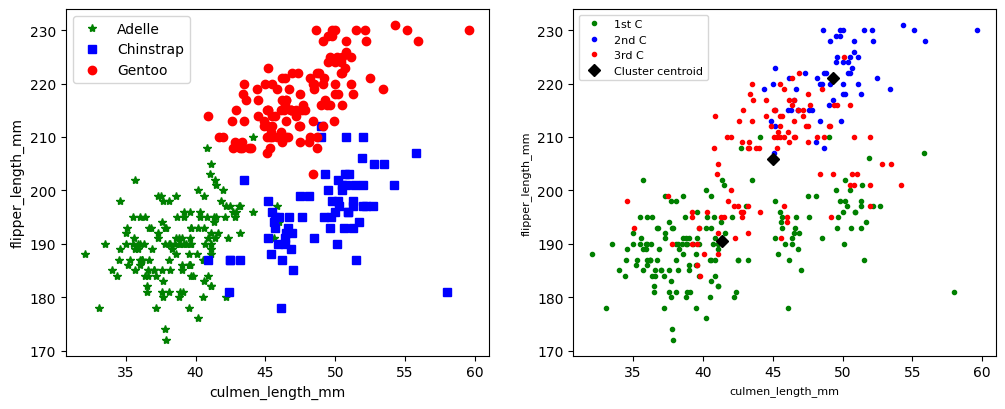

In [23]:
plt.figure(figsize=(12, 4.5))
#labeled samples
plt.subplot(121,)
plt.plot(X[y==0]['culmen_length_mm'], X[y==0]['flipper_length_mm'], "g*", label="Adelle")
plt.plot(X[y==1]['culmen_length_mm'], X[y==1]['flipper_length_mm'], "bs", label="Chinstrap")
plt.plot(X[y==2]['culmen_length_mm'], X[y==2]['flipper_length_mm'], "ro", label="Gentoo")
plt.xlabel("culmen_length_mm", fontsize=10)
plt.ylabel("flipper_length_mm", fontsize=10)
plt.legend(fontsize=10)
#unlabeled samples
# plt.subplot(122,)
# plt.plot(X[:]['culmen_length_mm'], X[:]['flipper_length_mm'], "k*", label="Unlabel instance")
# plt.xlabel("culmen_length_mm", fontsize=10)
# plt.ylabel("flipper_length_mm", fontsize=10)
# plt.legend(fontsize=10)
#cluster inferencing
plt.subplot(122,)
plt.plot(X[X['cluster']==0]['culmen_length_mm'], X[X['cluster']==0]['flipper_length_mm'], "g.", label="1st C")
plt.plot(X[X['cluster']==1]['culmen_length_mm'], X[X['cluster']==1]['flipper_length_mm'], "b.", label="2nd C")
plt.plot(X[X['cluster']==2]['culmen_length_mm'], X[X['cluster']==2]['flipper_length_mm'], "r.", label="3rd C")
plt.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], 'kD', label='Cluster centroid')
plt.xlabel("culmen_length_mm", fontsize=8)
plt.ylabel("flipper_length_mm", fontsize=8)
plt.legend(fontsize=8)
plt.show()

In [24]:
X_sel = X[['culmen_length_mm','flipper_length_mm']]
kmeans_sel = KMeans(n_clusters=3, n_init=50)
X_sel['cluster'] = kmeans_sel.fit_predict(X_sel)
X_sel

/tmp/ipython-input-24-1367936673.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_sel['cluster'] = kmeans_sel.fit_predict(X_sel)


,culmen_length_mm,flipper_length_mm,cluster
0,39.1,181.0,1
1,39.5,186.0,1
2,40.3,195.0,2
4,36.7,193.0,1
5,39.3,190.0,1
...,...,...,...
338,47.2,214.0,0
340,46.8,215.0,0
341,50.4,222.0,0
342,45.2,212.0,0


In [25]:
print(kmeans_sel.inertia_)
print(kmeans_sel.cluster_centers_)

13868.78619215541
[[ 47.6248     217.        ]
 [ 38.45304348 187.05217391]
 [ 45.94574468 196.84042553]]


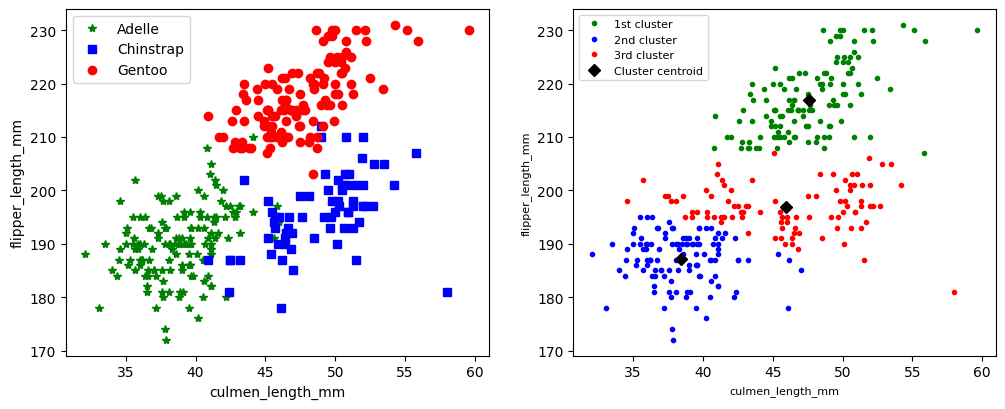

In [26]:
plt.figure(figsize=(12, 4.5))
#labeled samples
plt.subplot(121,)
plt.plot(X_sel[y==0]['culmen_length_mm'], X_sel[y==0]['flipper_length_mm'], "g*", label="Adelle")
plt.plot(X_sel[y==1]['culmen_length_mm'], X_sel[y==1]['flipper_length_mm'], "bs", label="Chinstrap")
plt.plot(X_sel[y==2]['culmen_length_mm'], X_sel[y==2]['flipper_length_mm'], "ro", label="Gentoo")
plt.xlabel("culmen_length_mm", fontsize=10)
plt.ylabel("flipper_length_mm", fontsize=10)
plt.legend(fontsize=10)
#unlabeled samples
# plt.subplot(122,)
# plt.plot(X[:]['culmen_length_mm'], X[:]['flipper_length_mm'], "k*", label="Unlabel instance")
# plt.xlabel("culmen_length_mm", fontsize=10)
# plt.ylabel("flipper_length_mm", fontsize=10)
# plt.legend(fontsize=10)
#cluster inferencing
plt.subplot(122,)
plt.plot(X_sel[X_sel['cluster']==0]['culmen_length_mm'], X_sel[X_sel['cluster']==0]['flipper_length_mm'], "g.", label="1st cluster")
plt.plot(X_sel[X_sel['cluster']==1]['culmen_length_mm'], X_sel[X_sel['cluster']==1]['flipper_length_mm'], "b.", label="2nd cluster")
plt.plot(X_sel[X_sel['cluster']==2]['culmen_length_mm'], X_sel[X_sel['cluster']==2]['flipper_length_mm'], "r.", label="3rd cluster")
plt.plot(kmeans_sel.cluster_centers_[:,0], kmeans_sel.cluster_centers_[:,1],
         'kD', label='Cluster centroid')
plt.xlabel("culmen_length_mm", fontsize=8)
plt.ylabel("flipper_length_mm", fontsize=8)
plt.legend(fontsize=8)
plt.show()

-----
# Homework

จาก seeds_dataset จงตอบคำถามต่างๆดังนี้
1. เลือกจำนวนคลัสเตอร์ (K) ที่เหมาะสม สำหรับการแบ่งกลุ่มข้อมูล เพื่อทำนายพันธุ์พืช (Class_Name)

2. การเทรนโมเดล
ทำการสร้างและเทรนโมเดล KMeans โดยใช้เฉพาะ 3 ฟีเจอร์แรก ได้แก่ Perimeter, Compactness, Length_of_kernel

3. แสดงผลการจัดกลุ่มของคลัสเตอร์
หลังจากทำการ Clustering แล้ว ให้สร้าง pivot table แสดงว่า แต่ละ cluster ประกอบด้วย Class_Name อะไรบ้าง และ มีจำนวนเท่าใด

4. ทำ Majority Voting
ให้นำผลจากข้อ 3 มาพิจารณา
หากใน cluster ใดมี class ใดปรากฏมากที่สุดให้ถือว่า cluster นั้น predict class นั้น

5. ให้เพิ่ม 3 คอลัมน์ใหม่ใน DataFrame โดยที่
 - cluster : หมายเลขคลัสเตอร์ที่โมเดลทำนาย
 - Predict : ชื่อพันธุ์พืชที่ทำนายได้จากข้อ 4
 - Status : แสดง True หาก Class_Name ตรงกับ Predict, ไม่เช่นนั้นให้เป็น False

6. คำนวณ Accuracy โดยใช้ column status และสร้างกราฟ 3D Scatter Plot โดยใช้ 3 ฟีเจอร์หลักที่ใช้ในโมเดล และระบายสีจุดข้อมูลตาม Class_Name และ Predict (ทำเป็น subplot 2 ภาพ)

7. หลังจากทำข้อ 1-6 เรียบร้อยแล้วนั้นให้ทำการเลือก 3 feature ที่ทำให้ได้ accuracy ที่สูงที่สุดพร้อมทั้งบอก feature ที่เลือกและ accuracy ที่ได้

8. จากข้อ 7 ให้ทำการสร้าง 3D Scatter Plot ใหม่อีกครั้ง โดยใช้ฟีเจอร์ที่เลือกไว้ พร้อมระบายสีตาม Class_Name และ Predict เช่นเดียวกับข้อ 6

*** ตัวอย่าง pivot table ของข้อที่ 3

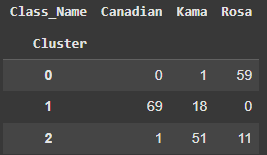

*** ตัวอย่างการเพิ่ม column ของข้อที่ 5

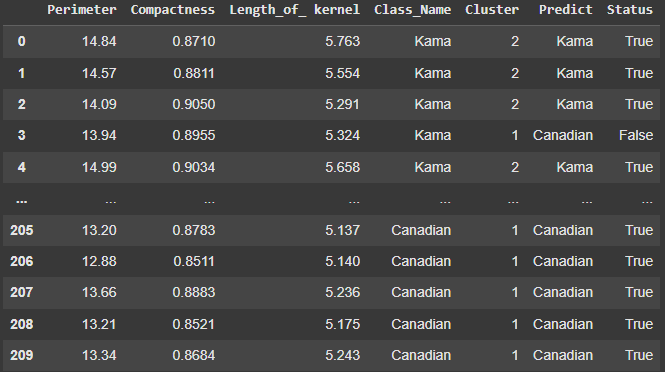

*** ตัวอย่าง 3D Scatter plot ของข้อที่ 6

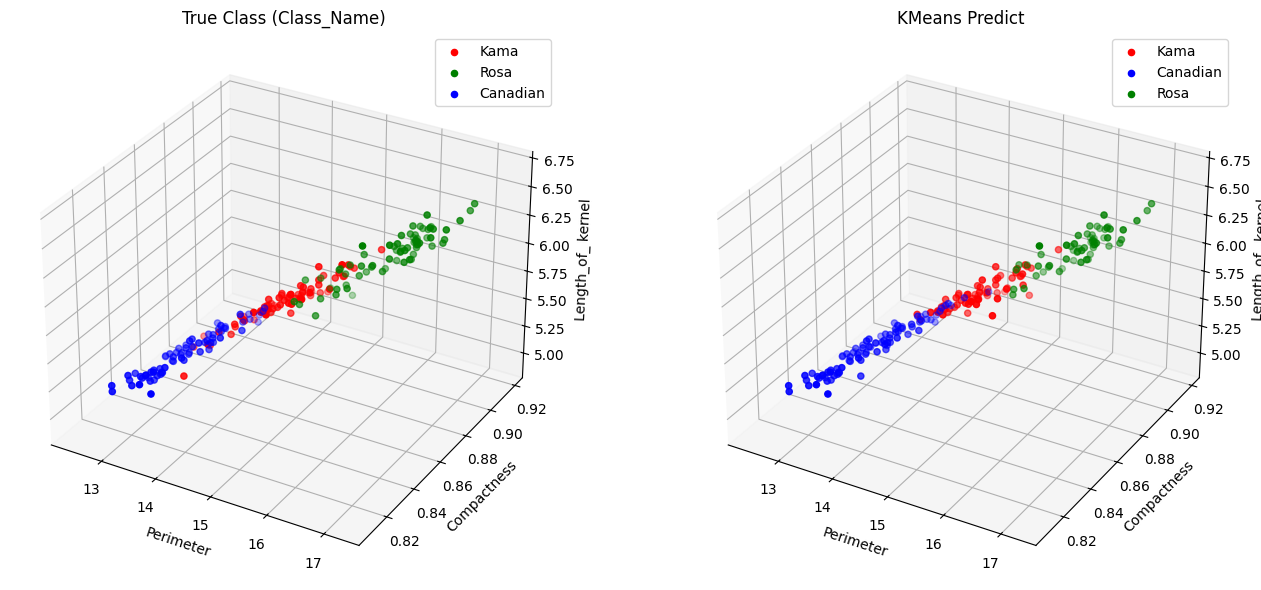

In [27]:
import kagglehub
import os

# Download latest version
folder_path = kagglehub.dataset_download("sushilyeotiwad/wheat-seed-dataset")

print(os.listdir(folder_path))
df = pd.read_csv(folder_path + '/seeds_dataset.csv')
df = df.rename(columns={'Class_(1, 2, 3)': 'Class'})

class_map = {1: 'Kama', 2: 'Rosa', 3: 'Canadian'}
df['Class_Name'] = df['Class'].map(class_map)
df = df.drop(columns=['Class'])

df

100%|██████████| 3.82k/3.82k [00:00<00:00, 4.46MB/s]

Extracting files...
['seeds_dataset.csv']


,Area,Perimeter,Compactness,Length_of_ kernel,Width_of_kernel,Asymmetry_coefficient,Length_of_kernel_groove,Class_Name
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,Canadian
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,Canadian
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,Canadian
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,Canadian


In [28]:
## สำหรับการทำข้อที่ 6
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D